# Data Visualization

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib as plt

# Load the data
sales = pd.read_csv("supermarket_sales.csv")

# Only Keep the underscored variable
# first to get rid of variables that I don’t need by using the drop() function.
sales = sales.drop(columns = ["City","Unit price","Tax 5%","Date","cogs","gross margin percentage"])

# Organize the time data
sales["Time"] = sales["Time"].map(lambda x:str(x)[:-3])

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   Customer type  1000 non-null   object 
 3   Gender         1000 non-null   object 
 4   Product line   1000 non-null   object 
 5   Quantity       1000 non-null   int64  
 6   Total          1000 non-null   float64
 7   Time           1000 non-null   object 
 8   Payment        1000 non-null   object 
 9   gross income   1000 non-null   float64
 10  Rating         1000 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 86.1+ KB


In [2]:
sales.head()

,Invoice ID,Branch,Customer type,Gender,Product line,Quantity,Total,Time,Payment,gross income,Rating
0,750-67-8428,A,Member,Female,Health and beauty,7,548.9715,13,Ewallet,26.1415,9.1
1,226-31-3081,C,Normal,Female,Electronic accessories,5,80.2200,10,Cash,3.8200,9.6
2,631-41-3108,A,Normal,Male,Home and lifestyle,7,340.5255,13,Credit card,16.2155,7.4
3,123-19-1176,A,Member,Male,Health and beauty,8,489.0480,20,Ewallet,23.2880,8.4
4,373-73-7910,A,Normal,Male,Sports and travel,7,634.3785,10,Ewallet,30.2085,5.3


In [3]:
# Subset the data
sales_A = sales[sales["Branch"]== "A"]
sales_B = sales[sales["Branch"]== "B"]
sales_C = sales[sales["Branch"]== "C"]

In [4]:
df = pd.DataFrame(sales_A.groupby(["Time"])["Rating"].mean())
df

,Rating
Time,
10,7.157895
11,6.840000
12,7.163636
13,7.300000
14,7.000000
15,7.245946
16,6.718750
17,6.840741
18,7.318182


Text(0.5, 1.0, 'Branch A Rating in a Day')

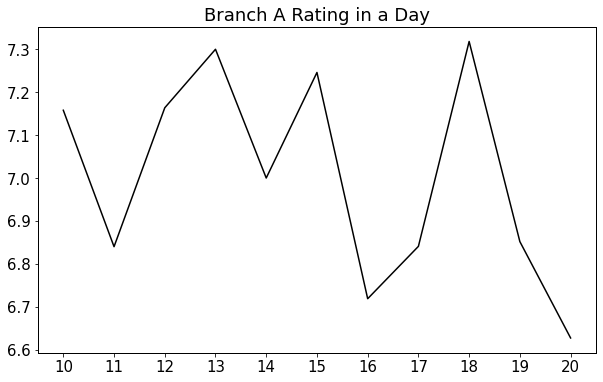

In [5]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
import sys

plt.rcParams['font.size'] = 15
plt.rcParams['axes.linewidth'] = 1

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df["Rating"], color="black")

ax.set_title('Branch A Rating in a Day')

# ax.set_ylim((6.6, 7.5))

In [6]:
# I am also curious that if the rating have association with the customer flow
# To prepare the data
df = pd.DataFrame(sales_A.groupby(["Time"])["Rating"].mean())
df["customerflow"] = sales_A.groupby(["Time"]).size()

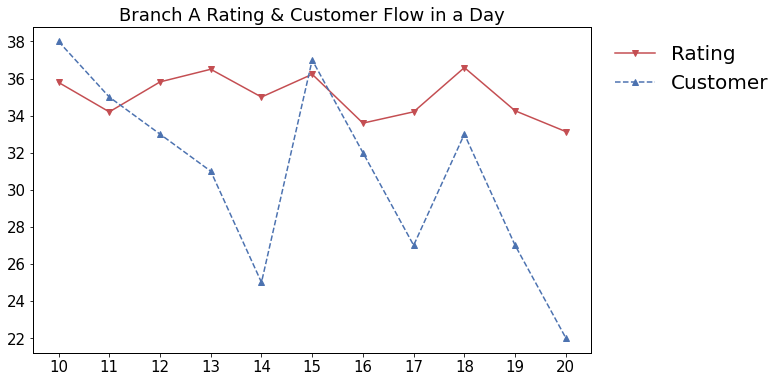

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = ["#C44E52", "#4C72B0"]

ax.plot(df.index, df['Rating']*5, linestyle="-",marker="v", color=colors[0])
ax.plot(df.index, df['customerflow'], linestyle="--",marker="^", color=colors[1])

ax.set_title('Branch A Rating & Customer Flow in a Day')


ax.legend(frameon=False, 
          loc= 1, 
          labels=["Rating", "Customer"], 
          bbox_to_anchor=(1.35, 1), 
          fontsize=20)

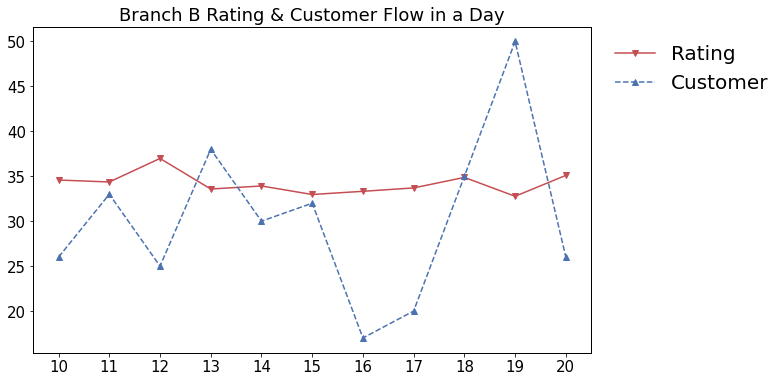

In [8]:
df = pd.DataFrame(sales_B.groupby(["Time"])["Rating"].mean())
df["customerflow"] = sales_B.groupby(["Time"]).size()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = ["#C44E52", "#4C72B0"]

ax.plot(df.index, df['Rating']*5, linestyle="-",marker="v", color=colors[0])
ax.plot(df.index, df['customerflow'], linestyle="--",marker="^", color=colors[1])

ax.set_title('Branch B Rating & Customer Flow in a Day')


ax.legend(frameon=False, 
          loc= 1, 
          labels=["Rating", "Customer"], 
          bbox_to_anchor=(1.35, 1), 
          fontsize=20)

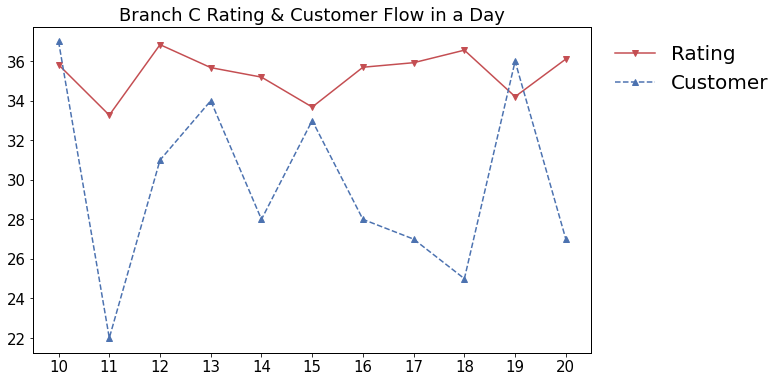

In [9]:
df = pd.DataFrame(sales_C.groupby(["Time"])["Rating"].mean())
df["customerflow"] = sales_C.groupby(["Time"]).size()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = ["#C44E52", "#4C72B0"]

ax.plot(df.index, df['Rating']*5, linestyle="-",marker="v", color=colors[0])
ax.plot(df.index, df['customerflow'], linestyle="--",marker="^", color=colors[1])

ax.set_title('Branch C Rating & Customer Flow in a Day')


ax.legend(frameon=False, 
          loc= 1, 
          labels=["Rating", "Customer"], 
          bbox_to_anchor=(1.35, 1), 
          fontsize=20)

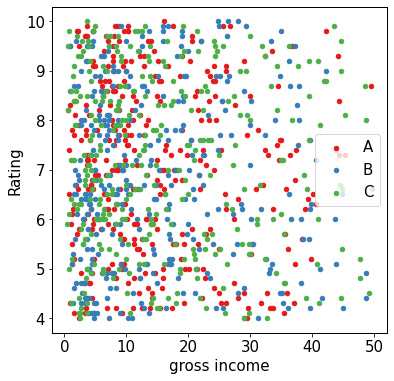

In [10]:

fig, ax = plt.subplots(figsize=(6, 6))

plt.rcParams['font.size'] = 15
plt.rcParams['axes.linewidth'] = 1

cmap = plt.get_cmap('Set1')
colors = {}
index = 0
unique_categories = np.unique(sales[['Branch']])
for category in unique_categories:
    colors[category] = cmap(index)
    index += 1
    
groups = sales.groupby('Branch')

for name, group in groups:
    group.plot(ax=ax, kind='scatter', x='gross income', y='Rating', 
               label=name,
               s=20,
               color=colors[name])


# ax.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90])
# ax.set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90])

# ax.set_yticks([2, 3, 4, 5, 6])
# ax.set_yticklabels(["$10^{2}$", "$10^{3}$", "$10^{4}$", "$10^{5}$", "$10^{6}$"])

# ax.set_xlabel("Life Expectancy", fontsize=20)
# ax.set_ylabel("per-capita GDP (log)", fontsize=20)

# ax.legend(frameon=False, 
#          loc= 1, 
#          labels=unique_categories, 
#          bbox_to_anchor=(1.5, 1), 
#          fontsize=20)

# PCA & MNIST

In the lecture and the python script provided, the code is really detailed.  
There, we did the 95% compression, so here I would do the 95% and 85% respectively, so that we could see the difference of dimension reduction.

In [11]:
# import the packages we might need to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [12]:
# Get the MNIST DATASET
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]   # label: 0 - 9

In [13]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [14]:
# Copy the DATASET
X95 = X
X85 = X
X1 = X

In [15]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# We do the 95% variance explained rate first
pca = PCA(0.95)
X95_reduced = pca.fit_transform(X95)
pca.n_components_

154

In [17]:
# For double checking
np.sum(pca.explained_variance_ratio_)

0.9503499702078617

In [18]:
# Take the data back so that we could visualize the data properly
X95_recovered = pca.inverse_transform(X95_reduced)

In [19]:
# To Build a Ploting Function
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = plt.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

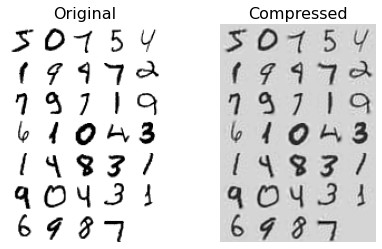

In [20]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X95_recovered[::2100])
plt.title("Compressed", fontsize=16)

In [21]:
# Then we do the 85% variance explained rate
pca = PCA(0.85)
X85_reduced = pca.fit_transform(X85)
pca.n_components_

59

In [22]:
# Obviously, the dimension reduce to 59, which is much smaller than 154.
# For double check
np.sum(pca.explained_variance_ratio_)

0.8508247062781702

In [23]:
# To recover the data
X85_recovered = pca.inverse_transform(X85_reduced)

Text(0.5, 1.0, 'Compressed by 85% explained variance')

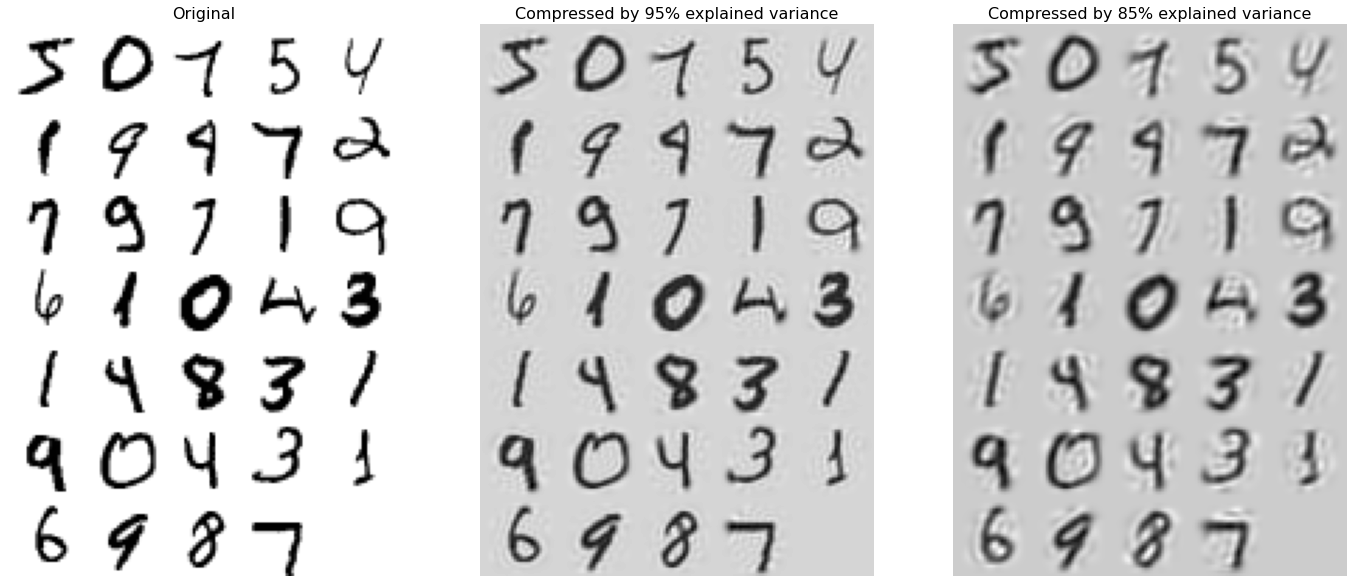

In [24]:
plt.figure(figsize=(24, 15))
plt.subplot(131)
plot_digits(X[::2100])
plt.title("Original", fontsize=16)
# The original plot

plt.subplot(132)
plot_digits(X95_recovered[::2100])
plt.title("Compressed by 95% explained variance", fontsize=16)
# the 95% explained variance plot

plt.subplot(133)
plot_digits(X85_recovered[::2100])
plt.title("Compressed by 85% explained variance", fontsize=16)
# the 85% explained variance plot

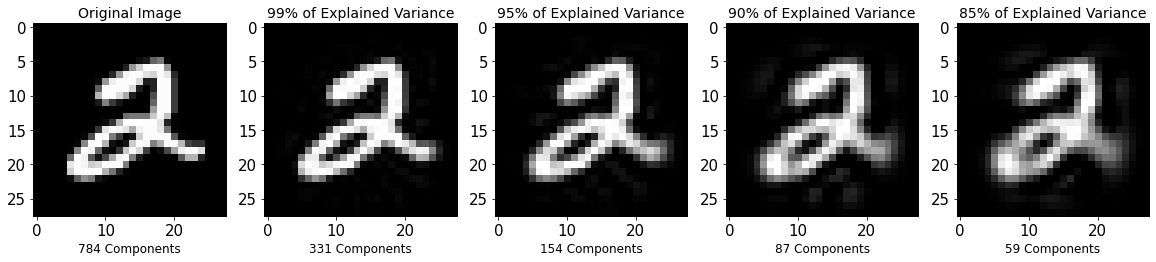

In [25]:
# To increase the Image contrast

# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal



plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(mnist.data[5].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);

# 2D Visualization Projection

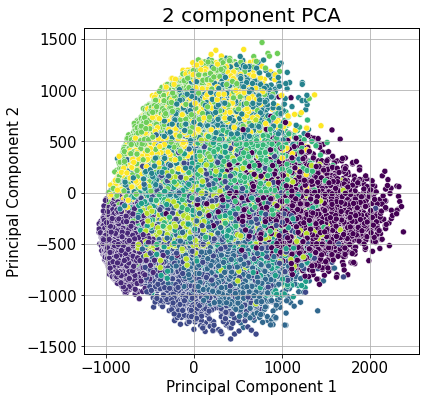

In [27]:
pca2d = PCA(n_components = 2)
principalComponents = pca2d.fit_transform(X1)
principalDF = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1','principal component 2'])


import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# ax.scatter(principalDF['principal component 1']
#                , principalDF['principal component 2']
#                , s = 50
#                , c = "violet") 

sns.scatterplot(x=principalDF['principal component 1'], y=principalDF['principal component 2'], 
                 palette='Paired', c = y, ax=ax)
# ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, s=30, cmap='Set1')


ax.grid()

In [28]:
principalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   principal component 1  70000 non-null  float64
 1   principal component 2  70000 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


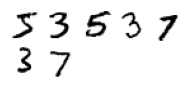

In [29]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X[::10000])

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# load MNIST dataset
X, y = datasets.load_digits(return_X_y=True)
print('Dimensions before PCA:', X.shape)

# use PCA to reduce dimension from 64 to 2
pca_2d = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=0))
pca_2d.fit(X, y)
X_pca_2d = pca_2d.transform(X)
print('Dimensions after PCA-2D:', X_pca_2d.shape)

Dimensions before PCA: (1797, 64)
Dimensions after PCA-2D: (1797, 2)


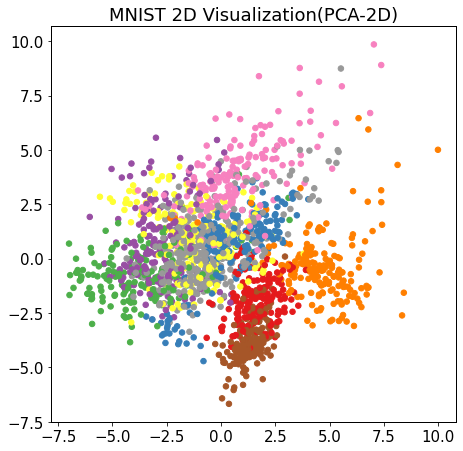

In [31]:
# plot the points projected with PCA
fig = plt.figure(figsize=(16, 16))


ax = fig.add_subplot(221)
ax.title.set_text('MNIST 2D Visualization(PCA-2D)')
ax.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, s=30, cmap='Set1')

plt.show()